# Red wine ANN

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

In [72]:
data = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')

In [73]:
#converting the response variables(3-7) as binary response variables that is either good or bad

names = ['bad', 'good']
#bins = (2, 6.5, 8)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [74]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [75]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      1
       ..
1569    1
1570    1
1571    1
1572    0
1573    1
1574    1
1575    1
1576    1
1577    1
1578    1
1579    0
1580    1
1581    0
1582    0
1583    0
1584    1
1585    1
1586    1
1587    1
1588    1
1589    0
1590    1
1591    1
1592    1
1593    1
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

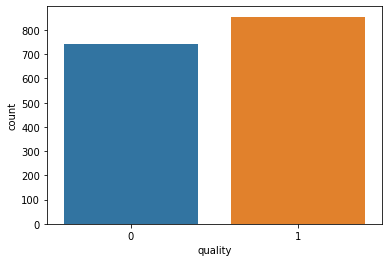

In [76]:
sns.countplot(data['quality'])

In [77]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [78]:
# dividing the dataset in training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [79]:
# standard scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [80]:
# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model.fit(x_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.9332777314428691
testing accuracy : 0.7425


In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [82]:
#creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)

W0825 01:40:25.279289 17980 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 01:40:25.356053 17980 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 01:40:25.378997 17980 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 01:40:25.464763 17980 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 01:40:25.50665

Epoch 1/100
1199/1199 [==============================] - 1s 570us/step - loss: 0.6841 - acc: 0.5505
Epoch 2/100
1199/1199 [==============================] - 0s 142us/step - loss: 0.5999 - acc: 0.7098
Epoch 3/100
1199/1199 [==============================] - 0s 138us/step - loss: 0.5395 - acc: 0.7481
Epoch 4/100
1199/1199 [==============================] - 0s 142us/step - loss: 0.5178 - acc: 0.7473
Epoch 5/100
1199/1199 [==============================] - 0s 274us/step - loss: 0.5108 - acc: 0.7490
Epoch 6/100
1199/1199 [==============================] - 0s 210us/step - loss: 0.5080 - acc: 0.7523
Epoch 7/100
1199/1199 [==============================] - 0s 148us/step - loss: 0.5066 - acc: 0.7531
Epoch 8/100
1199/1199 [==============================] - 0s 159us/step - loss: 0.5054 - acc: 0.7531
Epoch 9/100
1199/1199 [==============================] - 0s 255us/step - loss: 0.5044 - acc: 0.7573
Epoch 10/100
1199/1199 [==============================] - 0s 215us/step - loss: 0.5036 - acc: 0.7531